In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import warnings

warnings.filterwarnings('ignore')

In [4]:
LLM_data=pd.read_csv('TIME.csv')

In [5]:
ocr_data=pd.read_csv('TIME (1).csv')

In [7]:
df=pd.concat([LLM_data,ocr_data],axis=1)

In [10]:
df.drop(['Run ID'],axis=1,inplace=True)

In [12]:
df.columns=['LLM_RUN','LLM_TIME','OCR_RUN','OCR_TIME']

In [15]:
sns.barplot(data=df,x=df[["LLM_TIME","OCR_TIME"]])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [16]:
df

,LLM_RUN,LLM_TIME,OCR_RUN,OCR_TIME
0,LLM TIME FOR 20,401.857642,OCR TIME FOR 20,663.813476
1,LLM TIME FOR 15,271.420419,OCR TIME FOR 15,457.775394
2,LLM TIME FOR 10,175.819567,OCR TIME FOR 10,291.332258
3,LLM TIME FOR 5,106.738283,OCR TIME FOR 5,148.228621
4,LLM TIME FOR 4,70.626098,OCR TIME FOR 4,117.800172
5,LLM TIME FOR 3,43.764961,OCR TIME FOR 3,99.618373
6,LLM TIME FOR 2,22.974624,OCR TIME FOR 2,61.036829
7,LLM TIME FOR 1,9.359989,OCR TIME FOR 1,30.207591


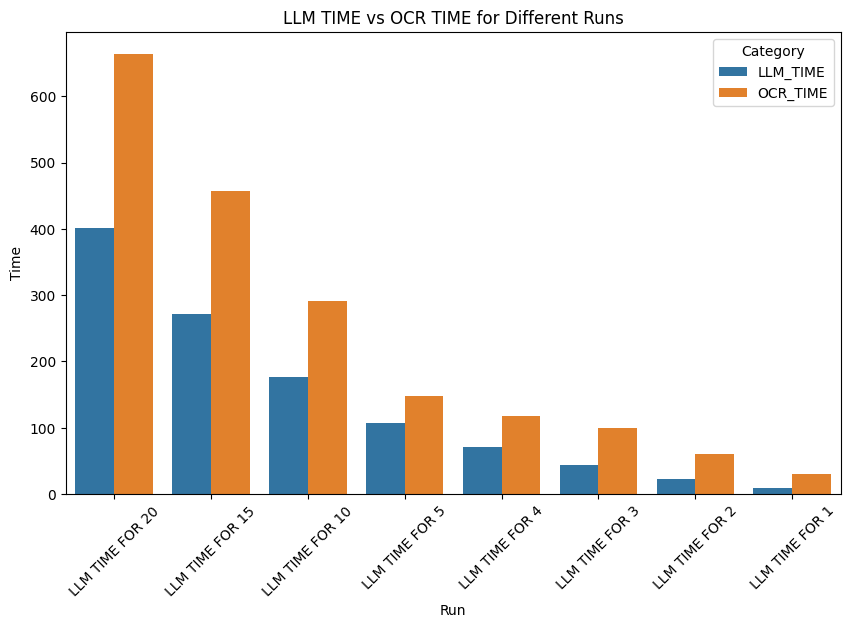

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame with the given data


# Reshaping the DataFrame to a long format suitable for Seaborn
df_melted = pd.melt(df, id_vars='LLM_RUN', value_vars=['LLM_TIME', 'OCR_TIME'], var_name='Category', value_name='Time')

# Plotting the clustered bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='LLM_RUN', y='Time', hue='Category', data=df_melted)
# Adding labels and title
plt.xlabel('Run')
plt.ylabel('Time')
plt.title('LLM TIME vs OCR TIME for Different Runs')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


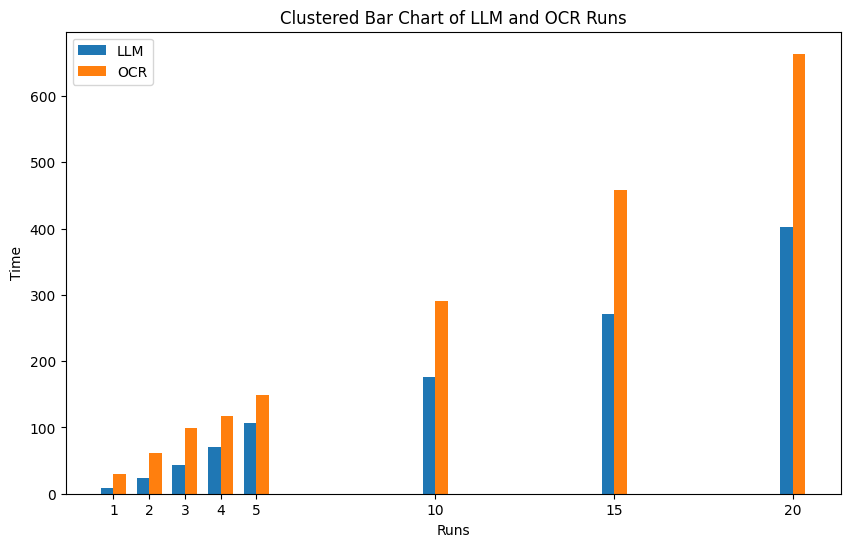

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    'LLM_RUN': ['LLM TIME FOR 20', 'LLM TIME FOR 15', 'LLM TIME FOR 10', 'LLM TIME FOR 5', 
                'LLM TIME FOR 4', 'LLM TIME FOR 3', 'LLM TIME FOR 2', 'LLM TIME FOR 1'],
    'LLM_TIME': [401.857642, 271.420419, 175.819567, 106.738283, 70.626098, 43.764961, 22.974624, 9.359989],
    'OCR_RUN': ['OCR TIME FOR 20', 'OCR TIME FOR 15', 'OCR TIME FOR 10', 'OCR TIME FOR 5', 
                'OCR TIME FOR 4', 'OCR TIME FOR 3', 'OCR TIME FOR 2', 'OCR TIME FOR 1'],
    'OCR_TIME': [663.813476, 457.775394, 291.332258, 148.228621, 117.800172, 99.618373, 61.036829, 30.207591]
}

df = pd.DataFrame(data)

# Extracting run counts for labeling
runs = [20, 15, 10, 5, 4, 3, 2, 1]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Width of bars

ax.bar(runs, df['LLM_TIME'], width, label='LLM')
ax.bar([x + width for x in runs], df['OCR_TIME'], width, label='OCR')

# Labels and title
ax.set_xlabel('Runs')
ax.set_ylabel('Time')
ax.set_title('Clustered Bar Chart of LLM and OCR Runs')
ax.set_xticks([x + width / 2 for x in runs])
ax.set_xticklabels(runs)
ax.legend()

plt.show()


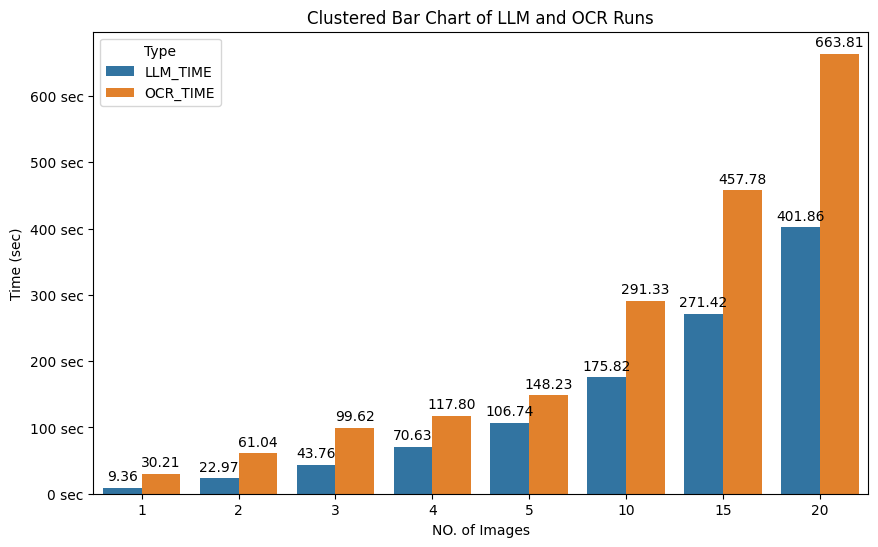

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    'LLM_RUN': ['LLM TIME FOR 20', 'LLM TIME FOR 15', 'LLM TIME FOR 10', 'LLM TIME FOR 5', 
                'LLM TIME FOR 4', 'LLM TIME FOR 3', 'LLM TIME FOR 2', 'LLM TIME FOR 1'],
    'LLM_TIME': [401.857642, 271.420419, 175.819567, 106.738283, 70.626098, 43.764961, 22.974624, 9.359989],
    'OCR_RUN': ['OCR TIME FOR 20', 'OCR TIME FOR 15', 'OCR TIME FOR 10', 'OCR TIME FOR 5', 
                'OCR TIME FOR 4', 'OCR TIME FOR 3', 'OCR TIME FOR 2', 'OCR TIME FOR 1'],
    'OCR_TIME': [663.813476, 457.775394, 291.332258, 148.228621, 117.800172, 99.618373, 61.036829, 30.207591]
}

df = pd.DataFrame(data)

# Melting the DataFrame to make it suitable for Seaborn
df_melted = pd.melt(df, id_vars=['LLM_RUN'], value_vars=['LLM_TIME', 'OCR_TIME'], 
                    var_name='Type', value_name='Time')

# Extracting run numbers from LLM_RUN
df_melted['Runs'] = df_melted['LLM_RUN'].str.extract('(\d+)').astype(int)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Runs', y='Time', hue='Type', data=df_melted)

# Annotating each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Adding "sec" units to the y-axis tick labels
ax.set_yticklabels([f'{int(tick)} sec' for tick in ax.get_yticks()])

# Labels and title
plt.xlabel('NO. of Images')
plt.ylabel('Time (sec)')
plt.title('Clustered Bar Chart of LLM and OCR Runs')
plt.savefig("CLustered.png")
plt.show()


In [21]:
df_melted

,LLM_RUN,Type,Time,Runs
0,LLM TIME FOR 20,LLM_TIME,401.857642,20
1,LLM TIME FOR 15,LLM_TIME,271.420419,15
2,LLM TIME FOR 10,LLM_TIME,175.819567,10
3,LLM TIME FOR 5,LLM_TIME,106.738283,5
4,LLM TIME FOR 4,LLM_TIME,70.626098,4
5,LLM TIME FOR 3,LLM_TIME,43.764961,3
6,LLM TIME FOR 2,LLM_TIME,22.974624,2
7,LLM TIME FOR 1,LLM_TIME,9.359989,1
8,LLM TIME FOR 20,OCR_TIME,663.813476,20
9,LLM TIME FOR 15,OCR_TIME,457.775394,15
